In [28]:
import matplotlib.pyplot as plt 
from misc import *
import tensorflow as tf
from tqdm import tqdm
import os 
from RNN_models import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from misc import load_data, get_def_path

periods = 5
ppp=1000
defpath = get_def_path()
path = defpath+"{}periods/{}ppp/".format(periods,ppp)


In [30]:
means, covs, signals, coeffs = load_data(path)
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs

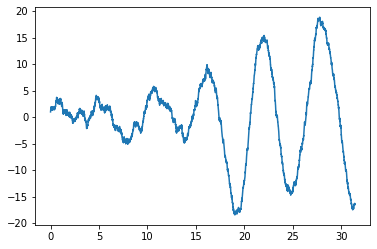

In [31]:
times = np.linspace(0,periods*2*np.pi, periods*ppp+1)
total_time = times[-1]
plt.plot(times, means[:,0])

In [20]:
rmodel = GRNNmodel([C,dt, total_time], cov_in=tf.convert_to_tensor(covs[0].astype(np.float32)), stateful=False)
rmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01))
rmodel.recurrent_layer(tfsignals[:,:10,:], initial_state=rmodel.initial_state)
#rmodel.trainable_variables[0].assign(tf.convert_to_tensor(A.astype(np.float32)))



<tf.Tensor: shape=(1, 10, 2), dtype=float32, numpy=
array([[[ 0.01256637,  0.        ],
        [ 0.01382301, -0.00114385],
        [ 0.01290305, -0.00240049],
        [ 0.01415969, -0.00365713],
        [ 0.01541633, -0.00491377],
        [ 0.01604471, -0.00543575],
        [ 0.01730135, -0.00669239],
        [ 0.01688732, -0.00746747],
        [ 0.01814396, -0.0087241 ],
        [ 0.01799402, -0.00998074]]], dtype=float32)>

In [21]:

history = rmodel.fit(x=tfsignals, y=tfsignals, 
                     epochs = 10**3, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='total_loss', 
                                                                                   min_delta=0, patience=500,
                                                                                   verbose=0,
                                                                                   mode='min')])



Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2765e-04 - Coeffs_A: -0.0187 - grads: -2.6746e-06
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2727e-04 - Coeffs_A: -0.0196 - grads: -2.9482e-06
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2690e-04 - Coeffs_A: -0.0211 - grads: -3.1093e-06
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2651e-04 - Coeffs_A: -0.0228 - grads: -3.2746e-06
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 5.2610e-04 - Coeffs_A: -0.0245 - grads: -3.4636e-06
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2568e-04 - Coeffs_A: -0.0263 - grads: -3.6715e-06
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2525e-04 - Coeffs_A: -0.0281 - grads: -3.8824e-06
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 5.2481e-04 -

1/1 [==============================] - 0s 1ms/step - total_loss: 5.0141e-04 - Coeffs_A: 0.1158 - grads: -2.7027e-05
Epoch 64/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9978e-04 - Coeffs_A: 0.1287 - grads: -2.6626e-05
Epoch 65/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9802e-04 - Coeffs_A: 0.1389 - grads: -1.1491e-05
Epoch 66/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9639e-04 - Coeffs_A: 0.1478 - grads: -1.3918e-05
Epoch 67/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9489e-04 - Coeffs_A: 0.1540 - grads: 7.6823e-06
Epoch 68/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9367e-04 - Coeffs_A: 0.1632 - grads: -5.7895e-05
Epoch 69/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9209e-04 - Coeffs_A: 0.1753 - grads: -1.1630e-04
Epoch 70/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9007e-04 - Coeffs_A: 0.1

1/1 [==============================] - 0s 1ms/step - total_loss: 4.9436e-04 - Coeffs_A: 0.1619 - grads: -0.0060
Epoch 128/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9443e-04 - Coeffs_A: 0.1619 - grads: -0.0030
Epoch 129/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 4.9442e-04 - Coeffs_A: 0.1620 - grads: 4.0031e-05
Epoch 130/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9441e-04 - Coeffs_A: 0.1623 - grads: -0.0049
Epoch 131/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9426e-04 - Coeffs_A: 0.1624 - grads: 0.0027
Epoch 132/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9419e-04 - Coeffs_A: 0.1629 - grads: -0.0053
Epoch 133/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9400e-04 - Coeffs_A: 0.1637 - grads: -0.0046
Epoch 134/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9370e-04 - Coeffs_A: 0.1644 - grads: -2.59

1/1 [==============================] - 0s 1ms/step - total_loss: 4.9245e-04 - Coeffs_A: 0.1718 - grads: -0.0190
Epoch 192/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9170e-04 - Coeffs_A: 0.1753 - grads: -0.0106
Epoch 193/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9085e-04 - Coeffs_A: 0.1783 - grads: 0.0022
Epoch 194/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.9014e-04 - Coeffs_A: 0.1806 - grads: 0.0052
Epoch 195/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.8962e-04 - Coeffs_A: 0.1809 - grads: 0.0194
Epoch 196/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.8957e-04 - Coeffs_A: 0.1806 - grads: 0.0071
Epoch 197/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.8966e-04 - Coeffs_A: 0.1802 - grads: 0.0020
Epoch 198/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 4.8979e-04 - Coeffs_A: 0.1796 - grads: 0.0032
Epoch

KeyboardInterrupt: 

In [22]:
rmodel.trainable_variables

[<tf.Variable 'rnn_2/stacked_rnn_cells_2/rcell_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.02057691,  0.24255036],
        [-0.17312805,  0.7227175 ]], dtype=float32)>]

In [28]:
histories = rmodel.history.history
keys_histories = list(histories.keys())
for k,v, in histories.items():
    np.save(train_path+"{}".format(k), v, allow_pickle=True)
